<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas/blob/main/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/eah2016_individual.csv?raw=true')

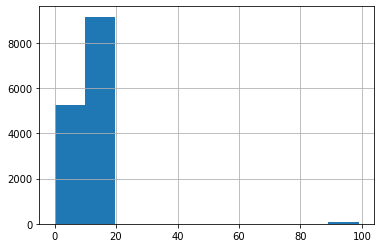

In [44]:
df.aesc.hist()

In [45]:
df=df.loc[df.aesc<20]

In [46]:
df=df[['aesc','logingreso']].dropna()

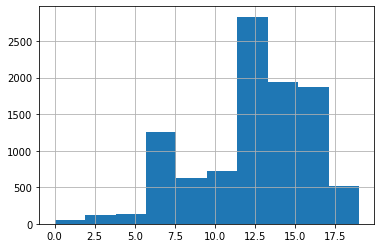

In [47]:
df.aesc.hist()

In [48]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [49]:
resultados=regress(['logingreso','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2507.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:44:52   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    301.990      0.0

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [50]:
# 10 años de escolaridad
8.0118+0.1011*10

9.022799999999998

In [51]:
# Departamento de 2 dormitorios
resultados.params['const']+resultados.params['aesc']*10

9.022579730303121

In [54]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['aesc']*df.aesc

0        9.224745
1        9.224745
2        9.224745
3        9.224745
4        9.224745
           ...   
14507    8.820414
14508    9.527993
14509    8.416084
14510    9.224745
14511    9.123662
Name: aesc, Length: 10082, dtype: float64

In [55]:
resultados.predict()

array([9.22474501, 9.22474501, 9.22474501, ..., 8.41608388, 9.22474501,
       9.12366237])

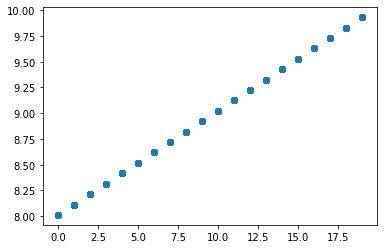

In [56]:
# Ploteamos prediccion con matplolib
plt.scatter(df.aesc, resultados.predict())

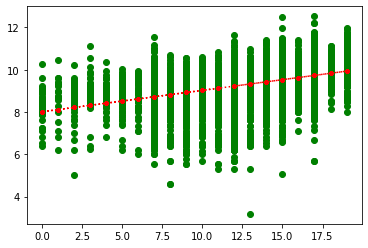

In [64]:
plt.scatter(df.aesc, df.logingreso, c='green')
plt.plot(df.aesc, resultados.predict(), c= "red", marker='.', linestyle=':')


# Error Cuadrático Medio


In [65]:
resultados.mse_resid

0.5933965875175048

Error Cuadrático Medio (MSE) a mano

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



In [66]:
ypred = resultados.predict()
residuos=df.logingreso-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

0.5933965875175049

In [67]:
MSE**0.5

0.7703223919356784

In [68]:
residuos2=residuos*residuos
residuos2.describe()

count    1.008200e+04
mean     5.932789e-01
std      1.280786e+00
min      6.906205e-10
25%      3.775540e-02
50%      1.961224e-01
75%      5.991571e-01
max      3.779512e+01
Name: logingreso, dtype: float64

In [69]:
residuos.describe()

count    1.008200e+04
mean    -2.794740e-15
std      7.702842e-01
min     -6.147774e+00
25%     -3.715081e-01
50%      8.090569e-02
75%      4.910087e-01
max      2.984093e+00
Name: logingreso, dtype: float64

# Propiedades de los estimadores cuando los errores son normales

¿Cuál es el beta que espero obtener si los errores de nuestro fueran errores normales?
Simulamos las estimaciones de los coeficientes beta en presencia de errores normales  



(array([  13.,  114.,  548., 1665., 2952., 2776., 1489.,  433.,   83.,
           9.]),
 array([-2.30430242, -1.8379841 , -1.37166577, -0.90534745, -0.43902912,
         0.0272892 ,  0.49360753,  0.95992585,  1.42624418,  1.8925625 ,
         2.35888083]),
 <a list of 10 Patch objects>)

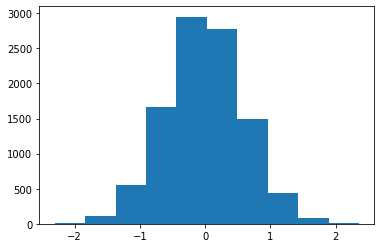

In [71]:
e_simu= np.random.normal(0,0.6,10082)
plt.hist(e_simu)


In [74]:
def simu():
  e_simu = np.random.normal(0,0.6,10082)
  X=df.aesc
  y_simu=resultados.params['const']+resultados.params['aesc']*X+e_simu
  model_simu=sm.OLS(y_simu,X)
  resultados_simu=model_simu.fit()
  #print(resultados_simu.summary())
  #print(resultados_simu.params['bedrooms'])
  return resultados_simu.params['aesc']
simu()

0.6842737990535448

In [77]:
betacoefs=[]
for i in range(0,2000):
  beta=simu()
  betacoefs.append(beta)
print(betacoefs)


[0.6849538295429911, 0.6849542761011616, 0.684587643956821, 0.6842496605521063, 0.6849553246616865, 0.6851793944189435, 0.6856831777514071, 0.6853357484477215, 0.6857377209696676, 0.6842867202722942, 0.6846148530678069, 0.6835304735232612, 0.6848855866112504, 0.6842381988172458, 0.6845047054530193, 0.6847775617884495, 0.6844855715955959, 0.6845371459935599, 0.6835562773568795, 0.6857333989887885, 0.6840631186824656, 0.6842157444315944, 0.6842276674371784, 0.6847190446867515, 0.6842844041235451, 0.6850945794601102, 0.6844073412055266, 0.6845138174712561, 0.6845060144005156, 0.6847034883101126, 0.6842196590315313, 0.6843390090613474, 0.6848720444866598, 0.6845703182025764, 0.6849862163934928, 0.6853277697471581, 0.6836824983659295, 0.6844496960773738, 0.6841821474090068, 0.6851359558478387, 0.6850899633663501, 0.684451470635286, 0.684448359196651, 0.6841758127111712, 0.6843735025067019, 0.685287769042044, 0.6846995009456598, 0.6849025465803364, 0.6846856882764969, 0.6846084351741496, 0.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d73c033c8>]],
      dtype=object)

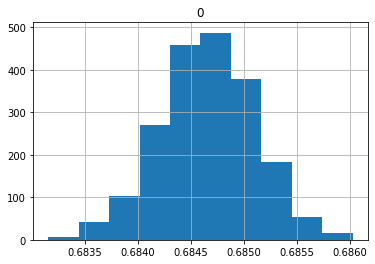

In [78]:
pd.DataFrame(betacoefs).hist()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(betacoefs)

# Cómo son los residuos (errores estimados) en mis datos?


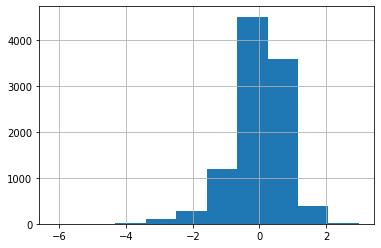

In [79]:
residuos.hist()

In [80]:
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit(cov_type='HC0')
  print(resultados.summary())
  return resultados

In [81]:
regress(['logingreso','aesc'],data=df)

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     2573.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:13:43   Log-Likelihood:                -11674.
No. Observations:               10082   AIC:                         2.335e+04
Df Residuals:                   10080   BIC:                         2.337e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0118      0.027    298.103      0.0